In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med'], shuffle=True, random_state=42)

In [ ]:
print("\n".join(twenty_train.data[0].split("\n")))
print(twenty_train.target_names[twenty_train.target[0]])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

comp.graphics


In [ ]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [ ]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [ ]:
len(twenty_train.data)

2257

# Tokenizing text with scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape #35788 different words

(2257, 35788)

In [ ]:
len(count_vect.vocabulary_)

35788

In [ ]:
count_vect.vocabulary_

{'from': 14887,
 'sd345': 29022,
 'city': 8696,
 'ac': 4017,
 'uk': 33256,
 'michael': 21661,
 'collier': 9031,
 'subject': 31077,
 'converting': 9805,
 'images': 17366,
 'to': 32493,
 'hp': 16916,
 'laserjet': 19780,
 'iii': 17302,
 'nntp': 23122,
 'posting': 25663,
 'host': 16881,
 'hampton': 16082,
 'organization': 23915,
 'the': 32142,
 'university': 33597,
 'lines': 20253,
 '14': 587,
 'does': 12051,
 'anyone': 5201,
 'know': 19458,
 'of': 23610,
 'good': 15576,
 'way': 34755,
 'standard': 30623,
 'pc': 24651,
 'application': 5285,
 'pd': 24677,
 'utility': 33915,
 'convert': 9801,
 'tif': 32391,
 'img': 17389,
 'tga': 32116,
 'files': 14281,
 'into': 18268,
 'format': 14676,
 'we': 34775,
 'would': 35312,
 'also': 4808,
 'like': 20198,
 'do': 12014,
 'same': 28619,
 'hpgl': 16927,
 'plotter': 25361,
 'please': 25337,
 'email': 12833,
 'any': 5195,
 'response': 27836,
 'is': 18474,
 'this': 32270,
 'correct': 9932,
 'group': 15837,
 'thanks': 32135,
 'in': 17556,
 'advance': 4378,

In [ ]:
print(X_train_counts[0].data) #every number corresponds to a unique word from the document and represents the times that word appears in the document
print(len(X_train_counts[0].data))
print(count_vect.inverse_transform(X_train_counts[0])) # city appears 4 times in the document

[1 1 4 2 2 3 3 1 2 1 4 2 2 2 1 1 1 1 1 5 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1]
73
[array(['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier',
       'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii',
       'nntp', 'posting', 'host', 'hampton', 'organization', 'the',
       'university', 'lines', '14', 'does', 'anyone', 'know', 'of',
       'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility',
       'convert', 'tif', 'img', 'tga', 'files', 'into', 'format', 'we',
       'would', 'also', 'like', 'do', 'same', 'hpgl', 'plotter', 'please',
       'email', 'any', 'response', 'is', 'this', 'correct', 'group',
       'thanks', 'in', 'advance', 'programmer', 'computer', 'unit', 'tel',
       '071', '477', '8000', 'x3769', 'london', 'fax', '8565', 'ec1v',
       '0hb'], dtype='<U80')]


In [ ]:
for frequency, word in list(zip(X_train_counts[0].data, count_vect.inverse_transform(X_train_counts[0])[0])):
  print(word, frequency)

from 1
sd345 1
city 4
ac 2
uk 2
michael 3
collier 3
subject 1
converting 2
images 1
to 4
hp 2
laserjet 2
iii 2
nntp 1
posting 1
host 1
hampton 1
organization 1
the 5
university 2
lines 1
14 1
does 1
anyone 1
know 1
of 1
good 1
way 1
standard 1
pc 1
application 1
pd 1
utility 1
convert 1
tif 1
img 1
tga 1
files 2
into 1
format 1
we 1
would 1
also 1
like 1
do 1
same 1
hpgl 1
plotter 1
please 1
email 2
any 1
response 1
is 1
this 1
correct 1
group 1
thanks 1
in 1
advance 1
programmer 1
computer 1
unit 1
tel 1
071 2
477 2
8000 1
x3769 1
london 1
fax 1
8565 1
ec1v 1
0hb 1


In [ ]:
# CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:
word_to_find = "science"
count_vect_idx = count_vect.vocabulary_.get(word_to_find)
print(f"The index of '{word_to_find}' is {count_vect_idx}")

The index of 'science' is 28897


In [ ]:
#lookup some word by their index in countvect
for word, idx in count_vect.vocabulary_.items(): 
    if idx == 26568:
        print(word)

pushes


## From occurrences to frequencies

In [ ]:
# Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.
# To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False)
tf_transformer.fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts) # only term frequency in single documents
X_train_tf.shape

(2257, 35788)

In [ ]:
# print(len(X_train_tf[0].data))
# print(X_train_tf[0].data)
# print(count_vect.inverse_transform(X_train_counts[0]))
doc_words_tf = X_train_tf[0].data
doc_unique_words = list(count_vect.inverse_transform(X_train_counts[0])[0])

print("WORD\t\t\t\tTF")
for tf, word in zip(doc_words_tf,doc_unique_words):
  print(f"{word}\t\t\t\t{tf}")

WORD				TF
071				0.15075567228888181
0hb				0.07537783614444091
14				0.07537783614444091
477				0.15075567228888181
8000				0.07537783614444091
8565				0.07537783614444091
ac				0.15075567228888181
advance				0.07537783614444091
also				0.07537783614444091
any				0.07537783614444091
anyone				0.07537783614444091
application				0.07537783614444091
city				0.30151134457776363
collier				0.22613350843332272
computer				0.07537783614444091
convert				0.07537783614444091
converting				0.15075567228888181
correct				0.07537783614444091
do				0.07537783614444091
does				0.07537783614444091
ec1v				0.07537783614444091
email				0.15075567228888181
fax				0.07537783614444091
files				0.15075567228888181
format				0.07537783614444091
from				0.07537783614444091
good				0.07537783614444091
group				0.07537783614444091
hampton				0.07537783614444091
host				0.07537783614444091
hp				0.15075567228888181
hpgl				0.07537783614444091
iii				0.15075567228888181
images				0.07537783614444091
img				0.0

In [ ]:
#Another refinement on top of tf is to decrease weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.
#this is done using the inverse document frequency or idf

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts) 
X_train_tfidf.shape

(2257, 35788)

In [ ]:
doc_words_tfidf = X_train_tfidf[0].data
doc_unique_words = list(count_vect.inverse_transform(X_train_counts[0])[0])

print("WORD\t\t\t\tTF\t\t\t\tTFIDF")
for tf, tfidf, word in zip(doc_words_tf,doc_words_tfidf,doc_unique_words):
  print(f"{word}\t\t\t\t{tf}\t\t\t\t{tfidf}")

WORD				TF				TFIDF
071				0.15075567228888181				0.1348710554299733
0hb				0.07537783614444091				0.0312703097833574
14				0.07537783614444091				0.034481472140846715
477				0.15075567228888181				0.043341654399042764
8000				0.07537783614444091				0.0999409997803694
8565				0.07537783614444091				0.06567578043186388
ac				0.15075567228888181				0.09313007554599557
advance				0.07537783614444091				0.11819702490105698
also				0.07537783614444091				0.07283773941616518
any				0.07537783614444091				0.12806013119559947
anyone				0.07537783614444091				0.023871142738151236
application				0.07537783614444091				0.08865416253721688
city				0.30151134457776363				0.04910237380446671
collier				0.22613350843332272				0.10218403421141944
computer				0.07537783614444091				0.08631915131162177
convert				0.07537783614444091				0.016797806021219684
converting				0.15075567228888181				0.0686611288079694
correct				0.07537783614444091				0.1348710554299733
do				0.07537783614444091				0.047271576

# Training a classifier

In [ ]:
# Now that we have our features, we can train a classifier to try to predict the category of a post. 
# Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; 
# the one most suitable for word counts is the multinomial variant:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf, twenty_train.target)

MultinomialNB()

In [ ]:
docs_new = ['God is love', 'OpenGL on the GPU is fast', "A new vaccination against covid disease has been found"]
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
  print(f'{doc} => {twenty_train.target_names[category]}')

God is love => soc.religion.christian
OpenGL on the GPU is fast => comp.graphics
A new vaccination against covid disease has been found => sci.med


# Building a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', MultinomialNB()),
 ])

In [ ]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

# Evaluation of the performance on the test set

In [ ]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med'], shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [ ]:
print(predicted)
print(twenty_test.target)


[2 2 3 ... 2 2 1]
[2 2 2 ... 2 2 1]


In [ ]:
# Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', 
                          penalty='l2',
                          alpha=0.001, 
                          random_state=42,
                          max_iter=5, 
                          tol=None)),
]) # https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.linear_model.SGDClassifier.html - loss hinge determines linear svm behaviour

text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.9101198402130493

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))


                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



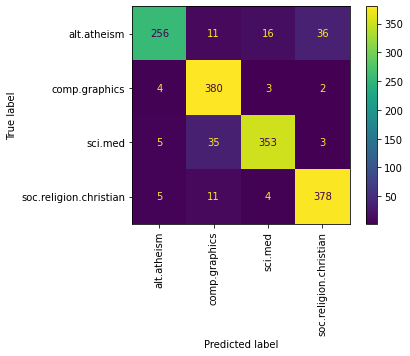

In [ ]:
cm = metrics.confusion_matrix(twenty_test.target, predicted)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=twenty_test.target_names)
disp.plot(xticks_rotation="vertical")

# Parameter tuning using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (0.01, 0.001, 0.0001),
}

In [ ]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [ ]:
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [ ]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

In [ ]:
gs_clf.best_score_

0.9711996938955713

In [ ]:
print(f"Original classifier accuracy: {np.mean(text_clf.predict(docs_test) == twenty_test.target)}")
print(f"Grid search classifier accuracy: {np.mean(gs_clf.best_estimator_.predict(docs_test) == twenty_test.target)}")

Original classifier accuracy: 0.9101198402130493
Grid search classifier accuracy: 0.9247669773635153


In [ ]:
for param_name in sorted(parameters.keys()):
  print(f"{param_name}: {gs_clf.best_params_[param_name]}")

clf__alpha: 0.0001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [ ]:
# The cv_results_ parameter can be easily imported into pandas as a DataFrame for further inspection.
import pandas as pd
pd.DataFrame(gs_clf.cv_results_)

#we see that generally using term frequency + inverse document frequency instead of just term frequency yelds better results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__alpha,param_tfidf__use_idf,param_vect__ngram_range,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.691115,0.011565,0.151566,0.016699,0.01,True,"(1, 1)","{'clf__alpha': 0.01, 'tfidf__use_idf': True, '...",0.904867,0.915929,0.866962,0.895787,0.911308,0.898971,0.017374,10
1,2.420084,0.041851,0.315422,0.004897,0.01,True,"(1, 2)","{'clf__alpha': 0.01, 'tfidf__use_idf': True, '...",0.935841,0.926991,0.898004,0.913525,0.920177,0.918908,0.012803,8
2,0.655135,0.036139,0.134220,0.007048,0.01,False,"(1, 1)","{'clf__alpha': 0.01, 'tfidf__use_idf': False, ...",0.820796,0.787611,0.796009,0.833703,0.796009,0.806826,0.017440,12
3,2.378171,0.036120,0.309279,0.024767,0.01,False,"(1, 2)","{'clf__alpha': 0.01, 'tfidf__use_idf': False, ...",0.825221,0.809735,0.813747,0.855876,0.820399,0.824996,0.016335,11
4,0.680175,0.037617,0.132948,0.009553,0.001,True,"(1, 1)","{'clf__alpha': 0.001, 'tfidf__use_idf': True, ...",0.964602,0.962389,0.962306,0.964523,0.973392,0.965443,0.004097,3
5,2.475501,0.042632,0.322778,0.009345,0.001,True,"(1, 2)","{'clf__alpha': 0.001, 'tfidf__use_idf': True, ...",0.966814,0.962389,0.953437,0.960089,0.964523,0.961450,0.004586,4
6,0.648877,0.029709,0.140574,0.015484,0.001,False,"(1, 1)","{'clf__alpha': 0.001, 'tfidf__use_idf': False,...",0.915929,0.896018,0.929047,0.913525,0.935698,0.918043,0.013732,9
7,2.407900,0.045426,0.324937,0.011466,0.001,False,"(1, 2)","{'clf__alpha': 0.001, 'tfidf__use_idf': False,...",0.931416,0.922566,0.935698,0.929047,0.937916,0.931329,0.005375,7
8,0.663651,0.033135,0.141205,0.010604,0.0001,True,"(1, 1)","{'clf__alpha': 0.0001, 'tfidf__use_idf': True,...",0.971239,0.973451,0.968958,0.966741,0.975610,0.971200,0.003144,1
9,2.443267,0.037207,0.310558,0.013843,0.0001,True,"(1, 2)","{'clf__alpha': 0.0001, 'tfidf__use_idf': True,...",0.975664,0.973451,0.968958,0.968958,0.966741,0.970754,0.003285,2


# Export model

In [ ]:
import pickle

In [ ]:
data = {"model": gs_clf.best_estimator_, "target_names": twenty_train.target_names}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

clf_loaded = data["model"]
target_names_loaded = data["target_names"]

In [ ]:
y_pred = clf_loaded.predict(["This Gaming Mouse will draw eyes to your desk thanks to its clean white exterior, slender shape, and glowing alien insignia."])
target_names_loaded[y_pred[0]]

'comp.graphics'